<h4>Jedan kompaktan grafik</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 10,'font.family': 'serif'})
plt.rcParams['figure.figsize'] = (.75*6.5, .75*4.5)

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.latex.preamble'] = r'\usepackage{icomma}\usepackage{upgreek}'

Km =  143.45013097514698 [Hz]
Tm =  1.971661676492394 [s]


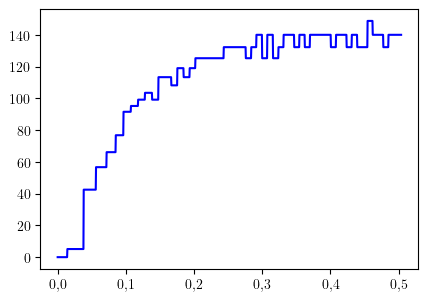

In [2]:
ts = 1/1e6
#8 - 2kHz
#6 - 1.4kHz
#4 - 925 kHz
#3 - 670Hz
#2 - 400Hz
#1 - 140Hz

fs = 1e9
fBase = 140 #Hz
sampling_rate = 1/fBase
#Citanje iz csv fajla
import pandas as pd
data = pd.read_csv('arduinoData/csvData_1V.csv').values
#ogranicavanje niza sa donje strane
for i in range (0, len(data)):
    if data[i]<-1:
        data[i] = -1
#sluzi za brojanje duzine perioda
counter = 0
#trazi najmanju periodu/najvecu ucestanost signala
counter2 = 512
#niz frekvencija
freq = np.zeros(len(data))
for i in range (0, len(data)):
    #krece da broji impuls od nule
    if data[i]>-1 and data[i]<1:
        counter += 1
    if data[i]>1:
        counter += 1
    #krece da broji novi impuls
    if (counter-1) and data[i-1]>1:
        if data[i]>-1 and data[i]<1:
            freq[i] = counter - 1
            counter2 = min(counter, counter2)
            counter = 1
#ts - razmak izmedju dva odbirka
ts = (1/fBase)/(counter2 - 1)
for i in range (0, len(freq)):
    freq[i] = 1/((freq[i]-1)*ts)
    if freq[i]<0:
        freq[i]=freq[i-1]



#Odokativnom metodom odredjeno gde da se odsece niz-----------------------------------------------
#1625:1760 - 2000
#130:500   - 1400
#5:450     - 925
#460:1780  - 670
#460:1760  - 400
#500:1700  - 140

data_freq = freq[500:1700]
t = np.arange(0, len(data_freq))

#Prvi parametar uvek x osa
def func(t, a, T):
    return a*(1-np.exp(-t/T))

plt.plot(t*ts, data_freq, 'b', label='merenje osciloskopa')

#Ako imamo predstavu koliko ce biti argumenti ovako mozemo da ubrzamo funkciju
initialGuess = [140, 300]

popt, pcov = curve_fit(func, t, data_freq, initialGuess)
data_freq1 = data_freq
t1 = t
popt1, pcov1 = popt, pcov

print('Km = ', popt[0], '[Hz]')
print('Tm = ', sampling_rate*popt[1],'[s]')

Km =  468.0333762528864 [Hz]
Tm =  0.5693988750221949 [s]


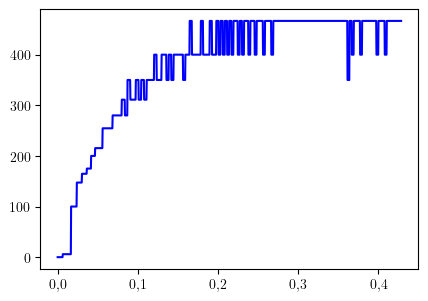

In [3]:
#8 - 2kHz
#6 - 1.4kHz
#4 - 925 kHz
#3 - 670Hz
#2 - 400Hz
#1 - 140Hz

fs = 1e9
fBase = 400 #Hz
sampling_rate = 1/fBase
#Citanje iz csv fajla
import pandas as pd
data = pd.read_csv('arduinoData/csvData_2V.csv').values
#ogranicavanje niza sa donje strane
for i in range (0, len(data)):
    if data[i]<-1:
        data[i] = -1
#sluzi za brojanje duzine perioda
counter = 0
#trazi najmanju periodu/najvecu ucestanost signala
counter2 = 512
#niz frekvencija
freq = np.zeros(len(data))
for i in range (0, len(data)):
    #krece da broji impuls od nule
    if data[i]>-1 and data[i]<1:
        counter += 1
    if data[i]>1:
        counter += 1
    #krece da broji novi impuls
    if (counter-1) and data[i-1]>1:
        if data[i]>-1 and data[i]<1:
            freq[i] = counter - 1
            counter2 = min(counter, counter2)
            counter = 1
#ts - razmak izmedju dva odbirka
ts = (1/fBase)/(counter2 - 1)
for i in range (0, len(freq)):
    freq[i] = 1/((freq[i]-1)*ts)
    if freq[i]<0:
        freq[i]=freq[i-1]



#Odokativnom metodom odredjeno gde da se odsece niz-----------------------------------------------
#1625:1760 - 2000
#130:500   - 1400
#5:450     - 925
#460:1780  - 670
#460:1760  - 400
#500:1700  - 140

data_freq = freq[460:1660]
t = np.arange(0, len(data_freq))

#Prvi parametar uvek x osa
def func(t, a, T):
    return a*(1-np.exp(-t/T))

plt.plot(t*ts, data_freq, 'b', label='merenje osciloskopa')

#Ako imamo predstavu koliko ce biti argumenti ovako mozemo da ubrzamo funkciju
initialGuess = [140, 300]

popt, pcov = curve_fit(func, t, data_freq, initialGuess)
data_freq2 = data_freq
t2 = t
popt2, pcov2 = popt, pcov

print('Km = ', popt[0], '[Hz]')
print('Tm = ', sampling_rate*popt[1],'[s]')

Km =  892.0781988177205 [Hz]
Tm =  0.3448560709712134 [s]


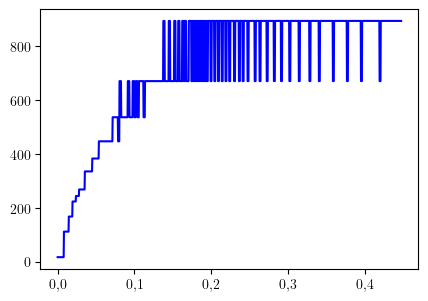

In [4]:
#8 - 2kHz
#6 - 1.4kHz
#4 - 925 kHz
#3 - 670Hz
#2 - 400Hz
#1 - 140Hz

fs = 1e9
fBase = 670 #Hz
sampling_rate = 1/fBase
#Citanje iz csv fajla
import pandas as pd
data = pd.read_csv('arduinoData/csvData_3V.csv').values
#ogranicavanje niza sa donje strane
for i in range (0, len(data)):
    if data[i]<-1:
        data[i] = -1
#sluzi za brojanje duzine perioda
counter = 0
#trazi najmanju periodu/najvecu ucestanost signala
counter2 = 512
#niz frekvencija
freq = np.zeros(len(data))
for i in range (0, len(data)):
    #krece da broji impuls od nule
    if data[i]>-1 and data[i]<1:
        counter += 1
    if data[i]>1:
        counter += 1
    #krece da broji novi impuls
    if (counter-1) and data[i-1]>1:
        if data[i]>-1 and data[i]<1:
            freq[i] = counter - 1
            counter2 = min(counter, counter2)
            counter = 1
#ts - razmak izmedju dva odbirka
ts = (1/fBase)/(counter2 - 1)
for i in range (0, len(freq)):
    freq[i] = 1/((freq[i]-1)*ts)
    if freq[i]<0:
        freq[i]=freq[i-1]



#Odokativnom metodom odredjeno gde da se odsece niz-----------------------------------------------
#1625:1760 - 2000
#130:500   - 1400
#5:450     - 925
#460:1780  - 670
#460:1760  - 400
#500:1700  - 140

data_freq = freq[460:1660]
t = np.arange(0, len(data_freq))

#Prvi parametar uvek x osa
def func(t, a, T):
    return a*(1-np.exp(-t/T))

plt.plot(t*ts, data_freq, 'b', label='merenje osciloskopa')

#Ako imamo predstavu koliko ce biti argumenti ovako mozemo da ubrzamo funkciju
initialGuess = [140, 300]

popt, pcov = curve_fit(func, t, data_freq, initialGuess)
data_freq3 = data_freq
t3 = t
popt3, pcov3 = popt, pcov

print('Km = ', popt[0], '[Hz]')
print('Tm = ', sampling_rate*popt[1],'[s]')

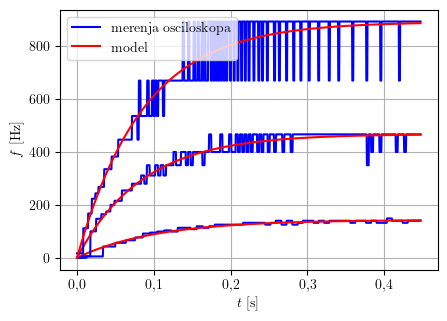

In [5]:
plt.plot(t1*ts, data_freq1, 'b', label='merenja osciloskopa')
plt.plot(t1*ts, func(t1, *popt1), 'r', label='model')
plt.plot(t2*ts, data_freq2, 'b')
plt.plot(t2*ts, func(t2, *popt2), 'r')
plt.plot(t3*ts, data_freq3, 'b')
plt.plot(t3*ts, func(t3, *popt3), 'r')
plt.xlabel('$t$ [s]')
plt.ylabel('$f$ [Hz]')
plt.grid()
plt.legend()
plt.savefig('fig_osc/compact.pdf', format='pdf', bbox_inches='tight')


In [6]:
500 + 1300

1800

<h2>Vremenski dijagram</h2>

In [18]:
plt.rcParams['figure.figsize'] = (.45*6.5, .35*6.5)

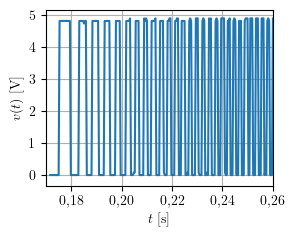

In [20]:
#8 - 2kHz
#6 - 1.4kHz
#4 - 925 kHz
#3 - 670Hz
#2 - 400Hz
#1 - 140Hz

fs = 1e9
fBase = 670 #Hz
sampling_rate = 1/fBase
#Citanje iz csv fajla
import pandas as pd
data = pd.read_csv('arduinoData/csvData_3V.csv').values
#ogranicavanje niza sa donje strane
for i in range (0, len(data)):
    if data[i]<-1:
        data[i] = -1



#Odokativnom metodom odredjeno gde da se odsece niz-----------------------------------------------
#1625:1760 - 2000
#130:500   - 1400
#5:450     - 925
#460:1780  - 670
#460:1760  - 400
#500:1700  - 140


t = np.arange(0, len(data))

plt.plot(t[460:860]*ts, data[460:860], label='merenje osciloskopa')
plt.xlabel('$t$ [s]')
plt.ylabel('$v(t)$ [V]')
plt.xlim(0.17,0.26)
plt.grid()
plt.savefig('fig_osc/vremenski.pdf', format='pdf', bbox_inches='tight')